# **MÓDULO 39 - Exercicio - Aplicando SVM**

Nessa atividade vocês usarão uma base já connhecida, a base de propensão a compra de carros. A mesma que também usamos na tarefa de XGboost!


In [2]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Carrega a base de dados, verifique os tipos de dados, dados faltantes e drop a coluna ID.


In [3]:
df = pd.read_csv('CARRO_CLIENTES.csv')

In [4]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [6]:
print(df.info())

df.drop('User ID', axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB
None


# 2. Aplique o Label Encoder para a coluna Gender e exclua a coluna categórica.

In [7]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [8]:
df.head()

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0


# 3. Faça a matriz de correlação e analise as váriaveis que parecem ter maior correlação com a váriavel target.

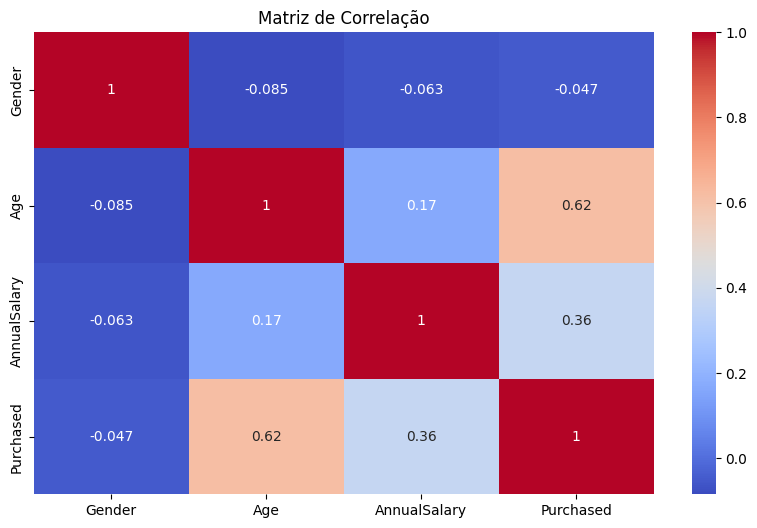

In [9]:
# Matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

Age apresenta uma correlação moderada com a variável alvo, provavelmente porque pessoas tendem a preciasar de carros e ter condições para comprá-los conforme ficam mais velhas.

# 4. Faça a separação da base em X e Y e em seguida nas bases de treino e teste.

In [10]:
# Separando os conjuntos de treino e teste
X = df.drop('Purchased',axis=1)
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Todos passos até aqui vocês realizaram na tarefa anterior também!**

# 5. Treino o modelo SVM com sua base de treino.
Esse modelo deve ser treinado usando o kernel linear.

In [11]:
# Treinando o modelo SVM
model_svm = SVC(kernel='linear',random_state = 1, C = 1.0)
model_svm.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


# 6. Realize as previsões para a base de teste e traga a avaliação.

In [ ]:
# Realizando previsões e avaliando o modelo
y_pred = model_svm.predict(X_test)

print("Avaliação do Modelo SVM:\n", classification_report(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))

Avaliação do Modelo SVM:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       112
           1       0.85      0.69      0.76        88

    accuracy                           0.81       200
   macro avg       0.82      0.80      0.80       200
weighted avg       0.81      0.81      0.81       200

Matriz de Confusão:
 [[101  11]
 [ 27  61]]


# 7. Treine um novo modelo SVM com sua base de treino + realize as previsões e avalições.
Esse modelo dedve ser treinado usando o kernel poly.

In [16]:
# treinando um modelo com kernel poly
model_svm_poly = SVC(kernel='poly', random_state=1, C=1.0)
model_svm_poly.fit(X_train, y_train)
y_pred_poly = model_svm_poly.predict(X_test)

print("Avaliação do Modelo SVM com Kernel Polinomial:\n", classification_report(y_test, y_pred_poly))
print("Matriz de Confusão (Kernel Polinomial):\n", confusion_matrix(y_test, y_pred_poly))

Avaliação do Modelo SVM com Kernel Polinomial:
               precision    recall  f1-score   support

           0       0.66      0.96      0.78       112
           1       0.89      0.36      0.52        88

    accuracy                           0.70       200
   macro avg       0.77      0.66      0.65       200
weighted avg       0.76      0.70      0.67       200

Matriz de Confusão (Kernel Polinomial):
 [[108   4]
 [ 56  32]]


# 8. Qual modelo se saiu melhor? O SVM com kernel linear ou poly? Compare também com o XGboost, da atividade anterior, você obteve melhores previsões com qual dos modelos?

O modelo que utilizou o kernel linear se saiu melhor do que o polinominal, provavelmente porque os dados dessa base são linearmente separáveis. Agora quando comparado ao XGBoost, o SVM demonstrou um desempenho consideravelmente inferior, principalmente quando se trata de fazer previsões corretas da classe 1, chegando apenas a 0.69 de recall no modelo treinado com o kernel linear, enquanto o XGBoost chegou a 0.86.